In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Market Table.xlsx')
df.head()

,Maket ID,Startup Type,Company Size,Challenges,Marketing Strategy,Years in Market
0,1,AgriTech,326,Market Competition,Social Media Marketing,2.0
1,2,FinTech,249,Market Competition,Social Media Marketing,3.0
2,3,FinTech,915,Product Development Issues,Content Marketing,2.0
3,4,RetailTech,620,Scaling and Growth,Direct Marketing,2.0
4,5,RetailTech,609,Financial Constraints,Content Marketing,1.0


In [3]:
df.tail()

,Maket ID,Startup Type,Company Size,Challenges,Marketing Strategy,Years in Market
1995,1996,FoodTech,184,Financial Constraints,Direct Marketing,2.0
1996,1997,AgriTech,679,Financial Constraints,Event Marketing,2.0
1997,1998,FinTech,234,Legal and Compliance Issues,Influencer Marketing,1.0
1998,1999,EdTech,928,Scaling and Growth,Influencer Marketing,1.0
1999,2000,FoodTech,184,Financial Constraints,Direct Marketing,2.0


In [4]:
df.shape   

(2000, 6)

In [5]:
df['Years in Market'].value_counts()

Years in Market
1.0    709
3.0    650
2.0    636
Name: count, dtype: int64

We Found that there are only 3 values in the Years in Market Column

In [6]:
df.isnull().sum()

Maket ID              0
Startup Type          0
Company Size          0
Challenges            0
Marketing Strategy    0
Years in Market       5
dtype: int64

In [8]:
df["Years in Market"] = df["Years in Market"].fillna(df["Years in Market"].shift(1))
# This extracts the Years in Market column from DataFrame and shifts its values down by one row.
# shift(1) function moves each value in the column to the next row, and the first row becomes NaN.

In [9]:
df[['Company Size']].describe().T

,count,mean,std,min,25%,50%,75%,max
Company Size,2000.0,501.3315,291.169663,-800.0,246.0,507.5,755.25,1000.0


In [10]:
#replace the outlire       
df['Company Size'] = df['Company Size'].replace(-800,800)

In [11]:
df[['Company Size']].describe().T

,count,mean,std,min,25%,50%,75%,max
Company Size,2000.0,502.1315,289.787164,5.0,246.75,508.0,756.0,1000.0


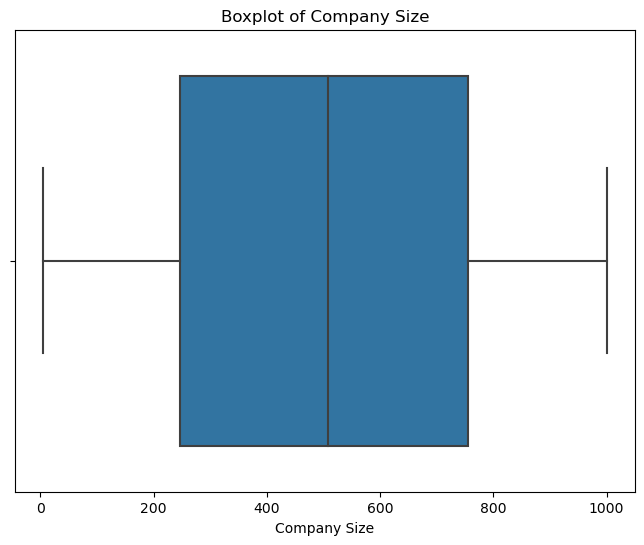

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Company Size', data=df)
plt.title('Boxplot of Company Size')
plt.xlabel('Company Size')
plt.show()

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Maket ID            2000 non-null   int64  
 1   Startup Type        2000 non-null   object 
 2   Company Size        2000 non-null   int64  
 3   Challenges          2000 non-null   object 
 4   Marketing Strategy  2000 non-null   object 
 5   Years in Market     2000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 93.9+ KB


In [16]:
#grouping the company size into segmants
def categorize_company_size(size):
  if 0 <= size <= 10:
    return '0-10'
  elif 10 < size <= 50:
    return '11-50'
  elif 50 < size <= 200:
    return '51-200'
  elif 200 < size <= 500:
    return '201-500'
  elif 500 < size <= 1000:
    return '501-1000'
  else:
    return 'Other'

df['Company Size Category'] = df['Company Size'].apply(categorize_company_size)

In [17]:
df.head()

,Maket ID,Startup Type,Company Size,Challenges,Marketing Strategy,Years in Market,Company Size Category
0,1,AgriTech,326,Market Competition,Social Media Marketing,2.0,201-500
1,2,FinTech,249,Market Competition,Social Media Marketing,3.0,201-500
2,3,FinTech,915,Product Development Issues,Content Marketing,2.0,501-1000
3,4,RetailTech,620,Scaling and Growth,Direct Marketing,2.0,501-1000
4,5,RetailTech,609,Financial Constraints,Content Marketing,1.0,501-1000


In [19]:
df['Company Size Category'].value_counts()

Company Size Category
501-1000    1009
201-500      588
51-200       304
11-50         89
0-10          10
Name: count, dtype: int64

<Axes: >

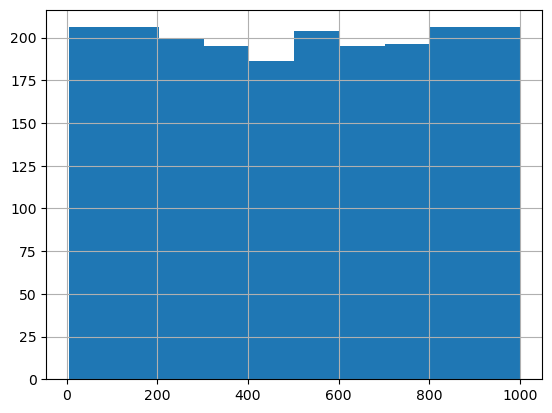

In [20]:
df['Company Size'].hist()

we did not find any distribution